# Lab 2: graphical analysis of difference equations

## Name: Keegan Ballantyne

### Lab section: Thursday

In [2]:
#Necessary imports
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities

## Introduction

In this lab assignment we will use graphical methods to analyze discrete-time dynamic models and predict the behavior of their solutions. in particular population models with linear growth rates. In this assignment you will implement iterative solutions of these models and plot these solutions over time. There is also an exploratory part of the assignment, in which you will investigate the effect of stochasticity on population growth, found in lab2_code_examples.ipnyb

You will need the following python coding skills,  which are illustrated in the lab2_code_examples.ipynb
 
 - Defining a function 
 - Plotting the updating functions of a discrete-time dynamic model
 - Producing a cobweb plot of solutions based on the plot of the updating function

## Part 1: linear population model

Let us take the linear model with a constant term:

$$ N(t+1)=rN(t)+a $$

**1.1**

1. Define a python function values with three inputs: N, r, and a that returns the value of the updating function above

2. For parameter values $r=0.9$ and $a=10$, plot the updating function along with the identity line over a wide enough range to include all fixed point(s)

3. Based on the plot, identify the fixed point(s) and determine their stability.

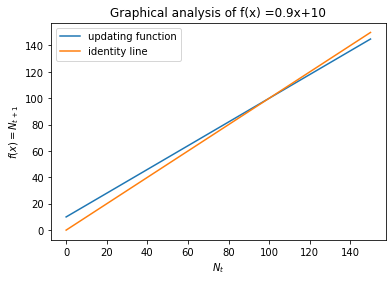

In [6]:
x = np.arange(0,150,0.1)

# Defining my function
def pop_model (N, r, a):
    """this functions defines a linear model with a constant term 'a'"""
    return r*N+a

# Setting up my arguments
r = 0.9
a = 10

# Calling my function
Nt = pop_model(x, r, a)

# Plotting my function
plt.plot(x, Nt, label = 'updating function') # plot the updating function
plt.plot(x, x, label = 'identity line')
plt.xlabel('$N_t$')
plt.ylabel('$f(x)=N_{t+1}$')
plt.title('Graphical analysis of f(x) =' +str(r)+ 'x+' +str(a))
plt.legend()
plt.show()

The intersection of the two lines represents the fixed point, and the fixed point in this plot is about 100. This is also the only fixed point for this model. This is a stable fixed point because 0.9<1.

**1.2** Using the function you created, make one cobweb plot of the model for each fixed point to illustrate its stability. For example, if there is a stable fixed point at 30, show a plot of a solution starting substantially above or below it (e.g. 70) and converging to it.

[95.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
[ 0  2  4  6  8 10 12 14 16 18]


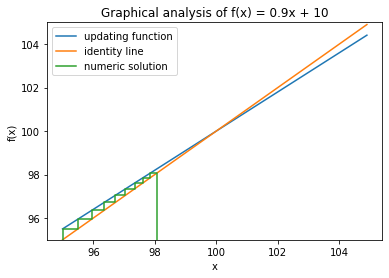

In [39]:
r = 0.9
a = 10
x = np.arange(95,105,0.1) # range of x values
Nt = pop_model(x, r, a) # values of the updating function
plt.plot(x, Nt, label = 'updating function') # plot the updating function
plt.plot(x, x, label = 'identity line')

n = 10 # number of steps
x = np.zeros(n*2)
y = np.zeros(n*2)
x[0] = 95
print(x)
print(np.arange(0,2*n,2))
for i in np.arange(0,2*(n-1),2):
    x[i+1] = x[i] # keep the same x coordinate
    y[i+1] = 0.9*x[i] + 10 # the updating function
    x[i+2] = y[i+1] # move to the next x value
    y[i+2] = y[i+1] # keep the same y coordinate
x[2*n-1] = x[2*n-2] # finish the last half-iteration
y[2*n-1] = 0.5*x[2*n-2] + 1 # finish the last half-iteration

plt.plot(x,y, label = 'numeric solution')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graphical analysis of f(x) = 0.9x + 10')
plt.ylim([95, 105])
plt.legend()
plt.show()

**1.3** Compute numeric solutions of the same model starting with the same initial value(s) you used in the cobweb plot(s), plot them over time, and describe how the behavior depends on initial value.

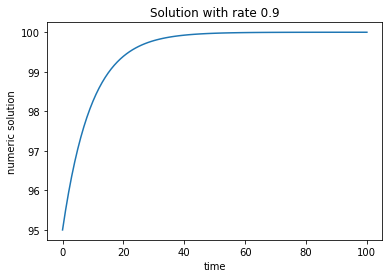

In [40]:
numsteps = 100 # number of iterations
growth = 0.9 # growth rate
pop = np.zeros(numsteps+1) # initialize solution array
pop[0] = 95 # initial value
t = np.arange(numsteps+1) # initialze time vector

for i in np.arange(numsteps):
    pop[i+1] = growth*pop[i]+10# linear model
    
plt.plot(t, pop) # plot solution
plt.xlabel('time')
plt.ylabel('numeric solution')
title = 'Solution with rate ' + str(growth)
plt.title(title)
plt.show()

The initial value does not seem to affect the behavior of this graph, which makes sense because the
fixed point is stable so within a reasonable neighborhood. We expect the value to converge to the
fixed point of 100.

## Part 2: natural selection in a haploid population

The following model describes the *frequency* $P$ of an allele $A$ in a haploid population, with parameter $V_A$ representing the *relative fitness* of $A$ compared to another allele $a$:

$$ P(t+1) = \frac{V_A P(t)}{V_A P(t) + (1 - P(t))}$$

1. Define a Python function with two inputs (P and V) that returns the value of the updating function above

2. For the given parameter values, plot the updating function along with the identity line over the biologically relevant range of variable P (allele frequency)

3. Based on the plots, identify the fixed point(s) and determine their stability for each parameter value.

4. Make a cobweb plot for a solution starting at a value between 0 and 1.

**2.1**  Use $V=0.5$ and perform the analysis outlined above. Comment on how the cobweb plot illustrates the stability of the fixed points.

[0.3 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0. ]
[ 0  2  4  6  8 10 12 14 16 18]


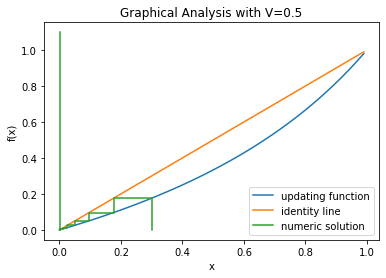

In [41]:
def allele_func (P, V):
    """this function defines the frequency P of allele A in haploid population"""
    return ((V*P)/(V*P+(1-P)))

P = np.arange(0,1,0.01)
V = 0.5

# Calling my function
Pt = allele_func(P, V)

# Plotting my function
plt.plot(P, Pt, label = 'updating function') # plot the updating function
plt.plot(P, P, label = 'identity line')
plt.xlabel('$N_t$')
plt.ylabel('$f(x)=N_{t+1}$')
plt.title('Graphical analysis of f(x) =' +str(P)+ 'x+' +str(V))

# the cobweb plot script
n = 10 # number of steps
x = np.zeros(n*2)
y = np.zeros(n*2)
x[0] = 0.3
print(x)
print(np.arange(0,2*n,2))
for i in np.arange(0,2*(n-1),2):
    x[i+1] = x[i] # keep the same x coordinate
    y[i+1] = allele_func(x[i], V)# the updating function
    x[i+2] = y[i+1] # move to the next x value
    y[i+2] = y[i+1] # keep the same y coordinate
x[2*n-1] = x[2*n-2] # finish the last half-iteration
y[2*n-1] = allele_func(P[2*n-2], V)+1 # finish the last half-iteration

plt.plot(x,y, label = 'numeric solution')    
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graphical Analysis with V=0.5')

plt.legend()
plt.show()

There is a fixed point at 0 and 1. Point 0 is stable and point 1 is unstable.

**2.2**  Use $V=2$ and perform the analysis outlined above. Comment on how the cobweb plot illustrates the stability of the fixed points.

[0.3 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0. ]
[ 0  2  4  6  8 10 12 14 16 18]


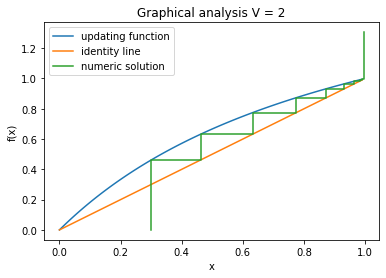

In [42]:
x = np.arange(0,1,0.01) # range of x values
V = 2
Pt = allele_func(x,V) # values of the updating function
plt.plot(x, Pt, label = 'updating function') # plot the updating function
plt.plot(x, x, label = 'identity line')

# the cobweb plot script
n = 10 # number of steps
x = np.zeros(n*2)
y = np.zeros(n*2)
x[0] = 0.3
print(x)
print(np.arange(0,2*n,2))
for i in np.arange(0,2*(n-1),2):
    x[i+1] = x[i] # keep the same x coordinate
    y[i+1] = allele_func(x[i], V) # the updating function
    x[i+2] = y[i+1] # move to the next x value
    y[i+2] = y[i+1] # keep the same y coordinate
x[2*n-1] = x[2*n-2] # finish the last half-iteration
y[2*n-1] = allele_func(P[2*n-2], V)+1 # finish the last half-iteration
plt.plot(x,y, label = 'numeric solution')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graphical analysis V = 2')
plt.legend()
plt.show()

There is a fixed point at 0 and 1. Point 0 is stable and point 1 is unstable.

**2.3** Compute numeric solutions of the model (using the code template from lab 1) for $V=0.5$ and $V=2$, starting with the same initial value(s) you used in the cobweb plot(s), plot them over time, and describe how the behavior depends on initial value. Explain how the parameter $V$ controls the stability of the fixed point(s) and provide a brief biological explanation.

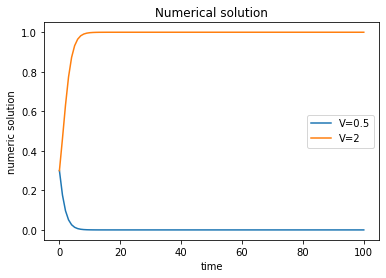

In [43]:
numsteps = 100 # number of iterations
fitness = 0.5 # growth rate
pop = np.zeros(numsteps+1) # initialize solution array
pop[0] = 0.3 # initial value
t = np.arange(numsteps+1) # initialze time vector

for i in np.arange(numsteps):
    pop[i+1] = (fitness*pop[i])/(fitness*pop[i]+(1-pop[i]))# linear model
plt.plot(t, pop, label = "V=0.5") # plot solution

fitness = 2 # growth rate
pop = np.zeros(numsteps+1) # initialize solution array
pop[0] = 0.3 # initial value
t = np.arange(numsteps+1) # initialze time vector

for i in np.arange(numsteps):
    pop[i+1] = (fitness*pop[i])/(fitness*pop[i]+(1-pop[i]))# linear model
plt.plot(t, pop, label = "V=2") # plot solution

plt.xlabel('time')
plt.ylabel('numeric solution')
title = 'Numerical solution'
plt.title(title)
plt.legend()
plt.show()

When V = 0.5 the allele freqency shifts to 0 as x goes to infinity. However when V = 2 the allele frequency
tends shifts to 1 as x goes to infinity. This makes sense because if an allele were not fit, it would not be passed on
and eventually would become extinct. The opposite is true as well.

## Part 3: logistic population model


Consider the logistic population model of the form

$$ N(t+1) = N(t) (r - sN(t)) $$

where $r$ is the *instrinsic growth rate* and $s$ is the *population dependence* parameter. Define a Python function for this model and use it for the tasks below.


**3.1** Set $r=1.5$; explore a range of positive values of $s$ along a reasonable range. For each value of $s$ make graphs of the updating function that include both fixed points with cobweb plots to illustrate the dynamics of the solution that starts between the two fixed points. In your report pick a few (2-4) values of $s$ to illustrate your exploration and produce the above-mentioned plots; describe how changing the parameter $s$ impacts the qualitative behavior of solutions of the model (do they converge to a fixed poin, diverge to infinity, bounce around, etc.)

[5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0  2  4  6  8 10 12 14 16 18]


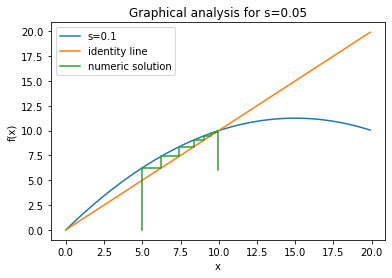

In [44]:
# def logistic(N, r, s):
#     """this function defines a logistic population model with r as the intrisic growth rate and s being the 
#     population dependence parameter"""
#     return (N*(r-s*N))

# # Setting up my arguments
# N = np.arange(0,20,0.1)
# r = 1.5
# s = 0.05

# # Calling my function
# Nt = logistic(N, r, s)

# # Plotting my function
# plt.plot(x, Nt, label = 'updating function') # plot the updating function
# plt.plot(x, x, label = 'identity line')
# plt.xlabel('$N_t$')
# plt.ylabel('$f(x)=N_{t+1}$')
# plt.title('Graphical analysis of f(x) =' +str(y)+ 'x+' +str(z))

def log(N,r,s):
    return(N*(r-s*N))
r=1.5
s=0.05
x = np.arange(0,20,0.1) # range of x values
fx = log(x,r,s) # values of the updating function
plt.plot(x, fx, label = 's=0.1') # plot the updating function
plt.plot(x, x, label = 'identity line')

# the cobweb plot script
n = 10 # number of steps
x = np.zeros(n*2)
y = np.zeros(n*2)
x[0] = 5
print(x)
print(np.arange(0,2*n,2))
for i in np.arange(0,2*(n-1),2):
    x[i+1] = x[i] # keep the same x coordinate
    y[i+1] = x[i]*(1.5-0.05*x[i])# the updating function
    x[i+2] = y[i+1] # move to the next x value
    y[i+2] = y[i+1] # keep the same y coordinate
x[2*n-1] = x[2*n-2] # finish the last half-iteration
y[2*n-1] = 0.5*x[2*n-2]+1 # finish the last half-iteration

plt.plot(x,y, label = 'numeric solution')    
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graphical analysis for s=0.05')

plt.legend()
plt.show()

[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0  2  4  6  8 10 12 14 16 18]


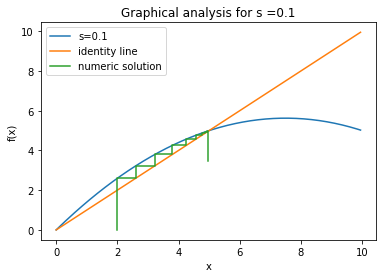

In [45]:
def log(N,r,s):
    return(N*(r-s*N))

x = np.arange(0,10,0.05) # range of x values
r=1.5
s=0.1
fx = log(x,r,s) # values of the updating function
plt.plot(x, fx, label = 's=0.1') # plot the updating function
plt.plot(x, x, label = 'identity line')

# the cobweb plot script
n = 10 # number of steps
x = np.zeros(n*2)
y = np.zeros(n*2)
x[0] = 2
print(x)
print(np.arange(0,2*n,2))

for i in np.arange(0,2*(n-1),2):
    x[i+1] = x[i] # keep the same x coordinate
    y[i+1] = x[i]*(1.5-0.1*x[i]) # the updating function
    x[i+2] = y[i+1] # move to the next x value
    y[i+2] = y[i+1] # keep the same y coordinate
x[2*n-1] = x[2*n-2] # finish the last half-iteration
y[2*n-1] = 0.5*x[2*n-2] + 1 # finish the last half-iteration
plt.plot(x,y, label = 'numeric solution')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graphical analysis for s =0.1')
plt.legend()
plt.show()

# x = np.arange(0,10,0.5) # range of x values
# fx = log(x,r,s) # values of the updating function
# plt.plot(x, fx, label = 's=0.1') # plot the updating function
# plt.plot(x, x, label = 'identity line')

# # the cobweb plot script
# n = 10 # number of steps
# x = np.zeros(n*2)
# y = np.zeros(n*2)
# x[0] = 5
# print(x)
# print(np.arange(0,2*n,2))
# for i in np.arange(0,2*(n-1),2):
#     x[i+1] = x[i] # keep the same x coordinate
#     y[i+1] = x[i]*(1.5-0.1*x[i])# the updating function
#     x[i+2] = y[i+1] # move to the next x value
#     y[i+2] = y[i+1] # keep the same y coordinate
# x[2*n-1] = x[2*n-2] # finish the last half-iteration
# y[2*n-1] = 0.5*x[2*n-2]+1 # finish the last half-iteration

# plt.plot(x,y, label = 'numeric solution')    
# plt.xlabel('x')
# plt.ylabel('f(x)')
# plt.title('Graphical analysis for s=0.1')

# plt.legend()
# plt.show()

It seems that s doesn’t alter whether the fixed point is stable or not. In these two examples, we see the cobweb plot converging well.

**3.2** Set $s= 0.05$; vary $r$ along a range of positive values (e.g. between 0 and 5). For each value of $r$ make a graph of the updating function that includes both fixed points with cobweb plots to illustrate the dynamics of the solution that starts between the two fixed points. In your report pick a few (2-4) values of $r$ to illustrate your exploration and produce the above-mentioned plots; describe how changing the parameter $r$ impacts the qualitative behavior of solutions of the model (do they converge to a fixed poin, diverge to infinity, bounce around, etc.

[30.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.]
[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38]


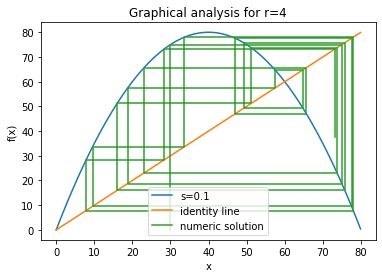

In [46]:
def log(N,r,s):
    return(N*(r-s*N))
r = 4
s = 0.05
x = np.arange(0,80,0.1) # range of x values
fx = log(x,r,s) # values of the updating function
plt.plot(x, fx, label = 's=0.1') # plot the updating function
plt.plot(x, x, label = 'identity line')

# the cobweb plot script
n = 20 # number of steps
x = np.zeros(n*2)
y = np.zeros(n*2)
x[0] = 30

print(x)
print(np.arange(0,2*n,2))

for i in np.arange(0,2*(n-1),2):
    x[i+1] = x[i] # keep the same x coordinate
    y[i+1] = log(x[i], r, s) # the updating function
    x[i+2] = y[i+1] # move to the next x value
    y[i+2] = y[i+1] # keep the same y coordinate

x[2*n-1] = x[2*n-2] # finish the last half-iteration
y[2*n-1] = 0.5*x[2*n-2] + 1 # finish the last half-iteration
plt.plot(x,y, label = 'numeric solution')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graphical analysis for r=4')
plt.legend()
plt.show()

# # Setting up my arguments
# x = np.arange(-5,10,0.1)
# y = 0.1
# z = 0.05

# #0.05 to 0.2

# # Calling my function
# Nt = func3(x, y, z)

# # Plotting my function
# plt.plot(x, Nt, label = 'updating function') # plot the updating function
# plt.plot(x, x, label = 'identity line')
# # plt.xlabel('$N_t$')
# # plt.ylabel('$f(x)=N_{t+1}$')
# # plt.title('Graphical analysis of f(x) =' +str(y)+ 'x+' +str(z))
# plt.legend()
# plt.show()

[5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0  2  4  6  8 10 12 14 16 18]


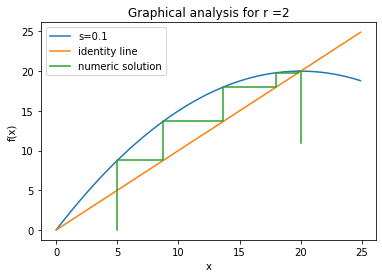

In [47]:
def log(N,r,s):
    return(N*(r-s*N))
r=2
s=0.05
x = np.arange(0,25,0.1) # range of x values
fx = log(x,r,s) # values of the updating function
plt.plot(x, fx, label = 's=0.1') # plot the updating function
plt.plot(x, x, label = 'identity line')

# the cobweb plot script
n = 10 # number of steps
x = np.zeros(n*2)
y = np.zeros(n*2)
x[0] = 5
print(x)
print(np.arange(0,2*n,2))
for i in np.arange(0,2*(n-1),2):
    x[i+1] = x[i] # keep the same x coordinate
    y[i+1] = log(x[i], r, s) # the updating function
    x[i+2] = y[i+1] # move to the next x value
    y[i+2] = y[i+1] # keep the same y coordinate
x[2*n-1] = x[2*n-2] # finish the last half-iteration
y[2*n-1] = 0.5*x[2*n-2] + 1 # finish the last half-iteration
plt.plot(x,y, label = 'numeric solution')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graphical analysis for r =2')
plt.legend()
plt.show()

# def log(N,r,s):
#     return(N*(r-s*N))
# r = 2
# s = 0.05
# x = np.arange(0,80,0.1) # range of x values
# fx = log(x,r,s) # values of the updating function
# plt.plot(x, fx, label = 's=0.1') # plot the updating function
# plt.plot(x, x, label = 'identity line')

# # the cobweb plot script
# n = 20 # number of steps
# x = np.zeros(n*2)
# y = np.zeros(n*2)
# x[0] = 30

# print(x)
# print(np.arange(0,2*n,2))

# for i in np.arange(0,2*(n-1),2):
#     x[i+1] = x[i] # keep the same x coordinate
#     y[i+1] = log(x[i], r, s) # the updating function
#     x[i+2] = y[i+1] # move to the next x value
#     y[i+2] = y[i+1] # keep the same y coordinate

# x[2*n-1] = x[2*n-2] # finish the last half-iteration
# y[2*n-1] = 0.5*x[2*n-2] + 1 # finish the last half-iteration
# plt.plot(x,y, label = 'numeric solution')
# plt.xlabel('x')
# plt.ylabel('f(x)')
# plt.title('Graphical analysis for r=4')
# plt.legend()
# plt.show()

We see that changing the value of r does alters whether there is chaotic behavior or not. It seems that when you increase r above a certain threshold, you will see the solution moving around an unstable point.

**3.3** Pick a combination of parameter values $r$ and $s$ that you found in your exploration above that produces chaotic behavior. Use these values to demonstrate the phenomenon of sensitive dependence on initial conditions by computing two numeric solutions starting from almost identical (e.g. different by 1e-5) initial conditions and plot them together over a long enough time frame to show their divergence.

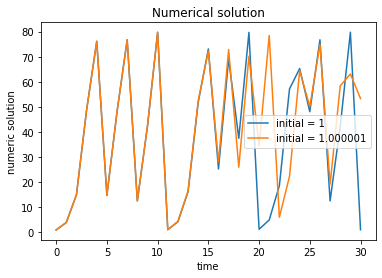

In [48]:
numsteps = 30 # number of iterations
r = 4 # growth rate
s = 0.05
pop = np.zeros(numsteps+1) # initialize solution array
pop[0] = 1 # initial value
t = np.arange(numsteps+1) # initialze time vector

for i in np.arange(numsteps):
    pop[i+1] = pop[i]*(r-s*pop[i])# linear model
    
plt.plot(t, pop, label = "initial = 1") # plot solution

pop = np.zeros(numsteps+1) # initialize solution array
pop[0] = 1.00001 # initial value

t = np.arange(numsteps+1) # initialze time vector

for i in np.arange(numsteps):
    pop[i+1] = pop[i]*(r-s*pop[i])# linear model

plt.plot(t, pop, label = "initial = 1.000001") # plot solution
plt.xlabel('time')
plt.ylabel('numeric solution')
title = 'Numerical solution'
plt.title(title)
plt.legend()
plt.show()

At around t = 15 the two models begin to diverge.